In [2]:
import pandas as pd
import numpy as np
#plotting
%matplotlib inline
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly
from plotly.subplots import make_subplots
#plotly.offline.init_notebook_mode(connected=True)

import yfinance as yf

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

#notebook formatting
from IPython.core.display import display, HTML
from IPython.display import IFrame

import warnings
warnings.filterwarnings('ignore')

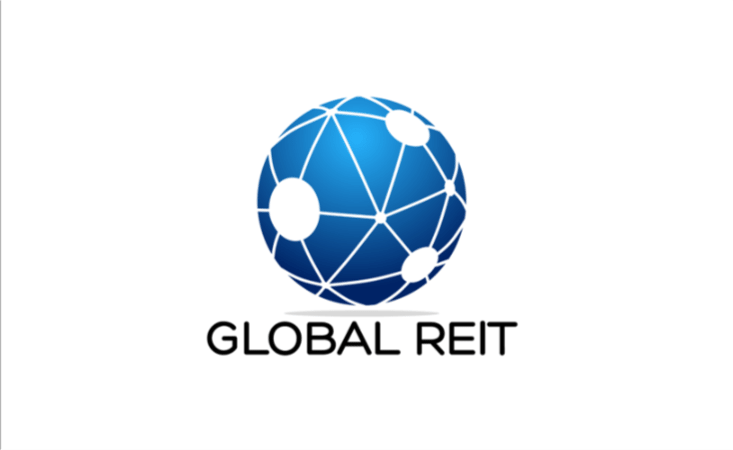

AS OF 10th February 2021

<a id ="content"></a>
## TABLE OF CONTENTS:

[GICS REIT Classification](#class)

-  [**Global Sector-Wise REIT Returns Box Plot - Interactive**](#1)


-  [**Global Country-Wise REIT Returns Box Plot - Interactive**](#2)


-  [**Global REIT Data Filter Table**](#table)


-  [**High Yielding & High Momentum Retail REITs**](#retail)


-  [**High Yielding & High Momentum Office REITs**](#office)


-  [**High Yielding & High Momentum Residential REITs**](#residential)


-  [**High Yielding & High Momentum Hotel & Resorts REITs**](#hotel)


-  [**High Yielding & High Momentum Industrial REITs**](#industrial)


-  [**High Yielding & High Momentum Specialized REITs**](#specialty)


-  [**High Yielding & High Momentum Diversified REITs**](#diverse)


-  [**High Yielding & High Momentum Global Healthcare REITs**](#health)

In [115]:
data = pd.read_excel('GREITS_N.xls', header=1, sheet_name='Dividend Paid')
def load_reits():
    reits = pd.read_excel('GREITS_N.xls', sheet_name='Dividend Paid', header=1).iloc[:, :13]
    return reits

reits = load_reits()

In [116]:
a = list(data["Country"].unique()) + ["All"]
#a.append(list(data["Country"]))

<a id ="class"></a>

## GICS REIT Classification Definitions

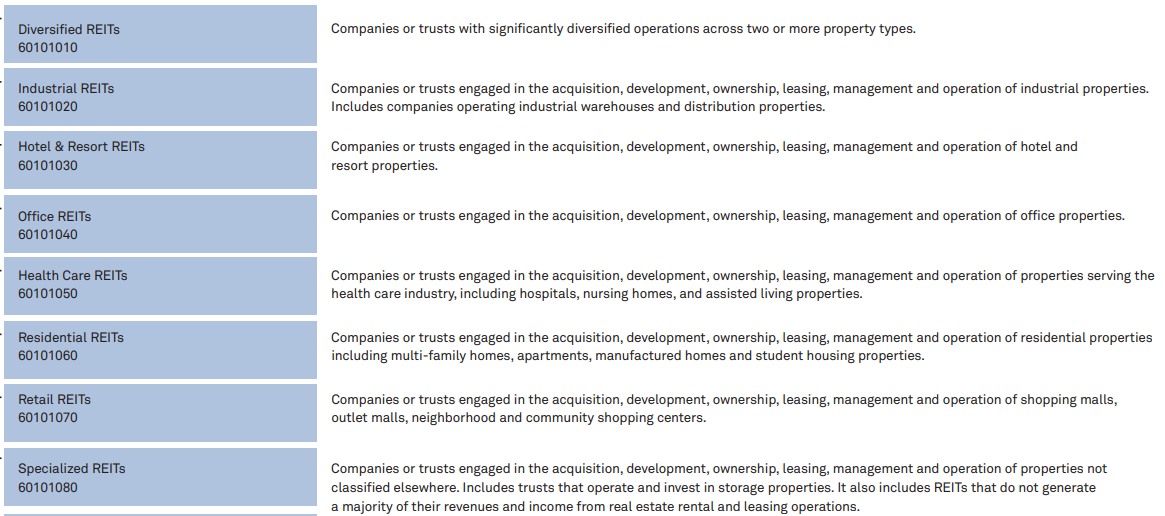

<a id ="1"></a>

[Return to Table of Contents](#content)

## Global Sector-Wise REIT Returns Box Plot

> 1. Select Country or Global

> 2. Select USD Total Return Period from 1M, 3M, 6M, YTD and 1Y or the Dividend Yield (%)

In [117]:
format_dict = {'1W': '{:.2f}%', '1M': '{:.2f}%', '3M': '{:.2f}%', '6M': '{:.2f}%', 'YTD': '{:.2f}%', '1Y': '{:.2f}%', 'Dividend Yield': '{:.2f}%', 'MCap ($B)': '${:.2f}B', 'Composite Rank': '{:.0f}'}
def reit_returns(period, country):
    data = reits.copy().round(2)
    if country == "All":
        fig = px.box(data, x="Industry", y=period, color="Industry", 
                     hover_data=["Country", "Ticker", "Name","MCap ($B)",
                                "Dividend Yield", '1W', '1M', '3M', 
                                 '6M', 'YTD', '1Y'], points="all")        
    else:
        fig = px.box(data[data["Country"] == country], x="Industry", y=period, color="Industry", 
                     hover_data=["Country", "Ticker", "Name","MCap ($B)",
                                "Dividend Yield", '1W', '1M', '3M', 
                                 '6M', 'YTD', '1Y'], points="all")  

    fig.update_layout(title = 'Global REITs Sector Wise USD Returns - '+str(period), 
                      font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                      legend_title_text='Industry', plot_bgcolor = 'White')
    fig.update_yaxes(ticksuffix="%")
    #fig.update_traces(hovertemplate='Date: %{x} <br>Return: %{y:.2%}') 
    return fig.show()
    
style = {'description_width': 'initial'}  
interact(reit_returns, period=widgets.Dropdown(options=['1W', '1M', '3M', 
                                 '6M', 'YTD', '1Y', 'Dividend Yield'], value='1M', 
                                               description = 'Period: ', style=style),
                        country = widgets.Dropdown(options=a, value="All", 
                                               description = 'Country: ', style=style));

interactive(children=(Dropdown(description='Period: ', index=1, options=('1W', '1M', '3M', '6M', 'YTD', '1Y', …

In [118]:
def ind_table(country, sortby):
    data1 = data[["Country","Industry", "Dividend Yield", "1W", "1M", "3M", "6M", "YTD", "1Y"]]
    if country=="All":
        return data1.groupby(by="Industry").mean().sort_values(by=sortby, ascending=False).style.format(format_dict).background_gradient(cmap="RdYlGn", subset=["1W", "1M", "3M", "6M", "YTD", "1Y"])
    else:
        return data1[data1["Country"]==country].groupby(by="Industry").mean().sort_values(by=sortby, ascending=False).style.format(format_dict).background_gradient(cmap="RdYlGn", subset=["1W", "1M", "3M", "6M", "YTD", "1Y"])
    
interact(ind_table, sortby=widgets.Dropdown(options=['1W','1M', '3M', 
                                 '6M', 'YTD', '1Y', 'Dividend Yield'], value='1M', 
                                               description = 'Period: ', style=style),
                        country = widgets.Dropdown(options=a, value="All", 
                                               description = 'Country: ', style=style));

interactive(children=(Dropdown(description='Country: ', index=25, options=('South Africa', 'United States', 'T…

[Return to Table of Contents](#content)

<a id ="2"></a>

## Global Country-Wise REIT Returns Box Plot

> Select USD Total Return Period from 1M, 3M, 6M, YTD and 1Y or the Dividend Yield (%)

In [119]:
def reit_cntry(industry, period):
    data = reits.copy().round(2)
    if industry=="All":
        fig = px.box(data, x="Country", y=period, color="Country", 
                     hover_data=["Industry", "Ticker", "Name","MCap ($B)",
                                "Dividend Yield", '1W', '1M','3M',
                                 '6M', 'YTD', '1Y'], points="all")
    else:
        fig = px.box(data[data["Industry"]==industry], x="Country", y=period, color="Country", 
                     hover_data=["Industry", "Ticker", "Name","MCap ($B)",
                                "Dividend Yield", '1W', '1M','3M',
                                 '6M', 'YTD', '1Y'], points="all")       

    fig.update_layout(title = 'Global REITs Country Wise USD Returns - '+str(period), 
                      font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                      legend_title_text='Countries', plot_bgcolor = 'White')
    fig.update_yaxes(ticksuffix="%")
    #fig.update_traces(hovertemplate='Date: %{x} <br>Return: %{y:.2%}') 
    return fig
    
style = {'description_width': 'initial'}  
interact(reit_cntry, period=widgets.Dropdown(options=reits.columns[6:13], value='YTD', 
                                               description = 'Period: ', style=style),
                     industry=widgets.Dropdown(options=["All"] + list(reits["Industry"].unique()) , value='All', 
                                               description = 'Industry: ', style=style));

interactive(children=(Dropdown(description='Industry: ', options=('All', 'Retail REITs', 'Specialized REITs', …

<a id ="table"></a>
## Global REIT Data Filter Table

[Return to Table of Contents](#content)

**NOTE: Composite Rank is calculated as follows:**

1. Rank performance on various timeframes and give weights to the rankings as follows:
   1 Week (5%), 1 Month (25%), 3 Months (25%), 6 Months (5%), YTD (5%), 1 Year (5%)
   
   
2. Rank on the basis of Dividen Yields and give 30% weight to the same


3. Calculate weighted average rank which is interpreted as lower is better.

Thus, this measure gives 70% weight to performance and 30% weight to return. The weights mentioned here can be changed by the user to see new rankings in the excel sheet sent along with this report.

All REITs used here have paid their last dividend.

In [120]:
def reit_table(country, industry, sortby):
    data = reits.copy().round(2)
    if sortby=='Composite Rank':
        order=True
    else:
        order=False
        
    if country == 'Global':
        if industry == "All":
            return data.set_index("Ticker").sort_values(by=sortby, ascending=order).style.format(format_dict)
        else:
            return data[data["Industry"]==industry].set_index("Ticker").sort_values(by=sortby, ascending=order).style.format(format_dict)
    else:
        if industry == "All":
            return data[data["Country"]==country].set_index("Ticker").sort_values(by=sortby, ascending=order).style.format(format_dict)
        else:
            return data[data["Country"]==country][data["Industry"]==industry].set_index("Ticker").sort_values(by=sortby, ascending=order).style.format(format_dict)
        
interact(reit_table, sortby=widgets.Dropdown(options=["Composite Rank", "Dividend Yield", '1W', '1M','3M',
                                 '6M', 'YTD', '1Y'], value='Composite Rank', 
                                               description = 'Sort By: ', style=style),
                        country = widgets.Dropdown(options= a[:-1] + ["Global"], value="Global", 
                                               description = 'Country: ', style=style),
                        industry = widgets.Dropdown(options= list(data['Industry'].unique()) + ["All"], value="All", 
                                               description = 'Industry: ', style=style));

interactive(children=(Dropdown(description='Country: ', index=25, options=('South Africa', 'United States', 'T…

In [121]:
#IFrame("https://www.reuters.com/companies/3478.T", width=1000, height=600)

<a id ="office"></a>

[Return to Table of Contents](#content)

## High Yielding & High Momentum Office REITs

In [122]:
div = data.set_index("Ticker").T[["3227 JP Equity", "3476 JP Equity", "CIO US Equity", "OPI US Equity", "8975 JP Equity", "3290 JP Equity", "8955 JP Equity", "PSTL US Equity", "SOT-U CN Equity", "SLG US Equity"]].T.sort_values(by="Composite Rank", ascending=True)
div.iloc[:,:12].drop(['Composite Rank'],axis=1).style.format(format_dict).background_gradient(cmap="RdYlGn").set_caption('GLOBAL TOP OFFICE REITs')

,Name,MCap ($B),Country,Industry,Dividend Yield,1W,1M,3M,6M,YTD,1Y
Ticker,,,,,,,,,,,
3227 JP Equity,MCUBS MIDCITY IN,$1.80B,Japan,Office REITs,5.72%,2.50%,16.52%,25.98%,52.55%,10.84%,-8.27%
3476 JP Equity,MIRAI CORP,$0.71B,Japan,Office REITs,5.64%,9.29%,15.69%,17.15%,37.51%,14.80%,-15.46%
CIO US Equity,CITY OFFICE REIT,$0.45B,Canada,Office REITs,5.76%,7.53%,9.57%,38.72%,14.23%,8.34%,-18.93%
OPI US Equity,OFFICE PROPERTIE,$1.21B,United States,Office REITs,8.68%,6.96%,9.17%,17.92%,3.71%,14.03%,-20.04%
8975 JP Equity,ICHIGO OFFICE,$1.26B,Japan,Office REITs,4.88%,5.50%,13.93%,20.32%,28.09%,14.41%,-17.06%
3290 JP Equity,ONE REIT INC,$0.67B,Japan,Office REITs,4.88%,8.48%,11.58%,18.92%,26.51%,10.31%,-14.39%
8955 JP Equity,JAPAN PRIM REALT,$3.47B,Japan,Office REITs,3.96%,4.07%,10.95%,24.65%,40.97%,9.43%,-13.68%
PSTL US Equity,POSTAL REALTY-A,$0.27B,United States,Office REITs,5.16%,6.92%,7.53%,16.23%,14.55%,-0.18%,11.16%
SOT-U CN Equity,SLATE OFFICE REI,$0.24B,Canada,Office REITs,9.31%,4.60%,2.43%,17.69%,26.73%,4.93%,-15.14%


<a id ="retail"></a>

[Return to Table of Contents](#content)

## High Yielding & High Momentum Retail REITs

In [123]:
div = data.set_index("Ticker").T[["HYP SJ Equity", "SKT US Equity", "YGGYO TI Equity", "RVI US Equity", "SPG US Equity", "IGD IM Equity", "RES SJ Equity", "8964 JP Equity", "BRX US Equity", "MAC US Equity", "BPYU US Equity", "8953 JP Equity", "KIM US Equity", "KRG US Equity", "UE US Equity", "3453 JP Equity"]].T.sort_values(by="Composite Rank", ascending=True)
div.iloc[:,:12].drop(['Composite Rank'],axis=1).style.format(format_dict).background_gradient(cmap="RdYlGn").set_caption('Global Top Residential REITs')

,Name,MCap ($B),Country,Industry,Dividend Yield,1W,1M,3M,6M,YTD,1Y
Ticker,,,,,,,,,,,
HYP SJ Equity,HYPROP INVESTMEN,$0.62B,South Africa,Retail REITs,12.12%,28.87%,39.14%,51.49%,119.19%,19.95%,-28.67%
SKT US Equity,TANGER FACTORY,$1.29B,United States,Retail REITs,4.90%,7.26%,26.63%,66.92%,127.66%,46.98%,11.37%
YGGYO TI Equity,YENI GIMAT GAYRI,$0.34B,Turkey,Retail REITs,6.93%,-0.41%,20.31%,31.41%,32.02%,25.86%,10.28%
RVI US Equity,RETAIL VALUE,$0.35B,United States,Retail REITs,6.48%,5.98%,13.94%,36.62%,42.56%,20.38%,-42.74%
SPG US Equity,SIMON PROPERTY,$35.16B,United States,Retail REITs,4.90%,13.75%,22.81%,36.82%,67.82%,24.55%,-20.37%
IGD IM Equity,IMMOBILIARE GRAN,$0.56B,Italy,Retail REITs,5.48%,14.85%,11.58%,31.20%,34.84%,14.65%,-20.73%
RES SJ Equity,RESILIENT REIT L,$1.16B,South Africa,Retail REITs,8.59%,11.98%,11.14%,19.18%,25.07%,0.77%,-27.67%
8964 JP Equity,FRONTIER REIT,$2.24B,Japan,Retail REITs,4.57%,6.02%,13.20%,25.29%,58.16%,13.60%,13.36%
BRX US Equity,BRIXMOR PROPERTY,$5.35B,United States,Retail REITs,4.66%,6.95%,12.22%,28.18%,51.28%,13.07%,-9.09%


<a id ="residential"></a>

[Return to Table of Contents](#content)

## High Yielding & High Momentum Residential REITs

In [124]:
div = data.set_index("Ticker").T[["APTS US Equity", "AIRC US Equity", "UMH US Equity", "BRG US Equity", "EQR US Equity", "CSH LN Equity", "INA AU Equity", "IRT US Equity", "UDR US Equity", "ESS US Equity", "AVB US Equity"]].T.sort_values(by="Composite Rank", ascending=True)
div.iloc[:,:12].drop(['Composite Rank'],axis=1).style.format(format_dict).background_gradient(cmap="RdYlGn").set_caption('Global Top Residential REITs')

,Name,MCap ($B),Country,Industry,Dividend Yield,1W,1M,3M,6M,YTD,1Y
Ticker,,,,,,,,,,,
APTS US Equity,PREFERRED APAR-A,$0.39B,United States,Residential REITs,8.45%,12.04%,10.55%,15.08%,15.42%,11.89%,-21.45%
AIRC US Equity,APARTMENT INCOME,$6.14B,United States,Residential REITs,4.18%,3.94%,9.62%,nan%,nan%,7.11%,nan%
UMH US Equity,UMH PROPERTIES I,$0.69B,United States,Residential REITs,4.50%,9.60%,13.74%,16.04%,26.14%,14.04%,8.88%
BRG US Equity,BLUEROCK RESIDEN,$0.28B,United States,Residential REITs,5.48%,9.31%,-0.34%,28.94%,62.18%,-6.39%,10.26%
EQR US Equity,EQUITY RESIDENTI,$24.55B,United States,Residential REITs,3.61%,5.91%,14.68%,9.85%,23.36%,12.70%,-17.90%
CSH LN Equity,CIVITAS SOCIAL H,$0.95B,United Kingdom,Residential REITs,4.89%,2.53%,5.84%,7.56%,7.37%,6.68%,28.65%
INA AU Equity,INGENIA COMMUNIT,$1.35B,Australia,Residential REITs,1.88%,-1.12%,8.85%,21.75%,23.63%,8.83%,32.41%
IRT US Equity,INDEPENDENCE REA,$1.35B,United States,Residential REITs,3.29%,7.43%,9.60%,6.83%,23.68%,8.79%,0.54%
UDR US Equity,UDR INC,$12.12B,United States,Residential REITs,3.45%,6.24%,11.64%,5.54%,18.31%,9.63%,-12.18%


<a id ="hotel"></a>

[Return to Table of Contents](#content)

## High Yielding & High Momentum Hotel & Resort REITs

In [125]:
div = data.set_index("Ticker").T[["MGP US Equity", "PEB US Equity", "8963 JP Equity", "3478 JP Equity", "3287 JP Equity", "CDREIT SP Equity", "8985 JP Equity", "AKFGY TI Equity", "SVC US Equity", "RLJ US Equity"]].T.sort_values(by="Composite Rank", ascending=True)
div.iloc[:,:12].drop(['Composite Rank'],axis=1).style.format(format_dict).background_gradient(cmap="RdYlGn").set_caption('Global Top Hotel & Resort REITs')

,Name,MCap ($B),Country,Industry,Dividend Yield,1W,1M,3M,6M,YTD,1Y
Ticker,,,,,,,,,,,
MGP US Equity,MGM GROWTH PRO-A,$10.69B,United States,Hotel & Resort REITs,5.93%,1.07%,4.54%,12.43%,18.68%,5.14%,4.95%
PEB US Equity,PEBBLEBROOK HOTE,$2.61B,United States,Hotel & Resort REITs,0.20%,2.55%,7.06%,20.82%,65.78%,8.94%,-17.54%
8963 JP Equity,INVINCIBLE INVES,$2.32B,Japan,Hotel & Resort REITs,0.66%,14.13%,19.15%,5.14%,62.42%,18.56%,-23.37%
3478 JP Equity,MORI TRUST HOTEL,$0.60B,Japan,Hotel & Resort REITs,1.03%,3.95%,10.09%,6.18%,39.59%,6.81%,-7.28%
3287 JP Equity,HOSHINO RESORTS,$1.16B,Japan,Hotel & Resort REITs,2.20%,4.99%,7.26%,5.68%,31.68%,6.99%,12.92%
CDREIT SP Equity,CDL REIT,$1.11B,Singapore,Hotel & Resort REITs,5.78%,0.05%,-4.35%,4.57%,33.82%,-3.26%,-11.23%
8985 JP Equity,JAPAN HOTEL REIT,$2.51B,Japan,Hotel & Resort REITs,0.66%,5.76%,10.06%,3.34%,46.37%,9.55%,-14.21%
AKFGY TI Equity,AKFEN GAYRIMENKU,$0.23B,Turkey,Hotel & Resort REITs,0.00%,1.84%,-1.17%,31.11%,62.59%,0.73%,1.33%
SVC US Equity,SERVICE PROPERTI,$1.94B,United States,Hotel & Resort REITs,0.33%,7.95%,5.05%,9.72%,44.12%,5.23%,-45.76%


<a id ="diverse"></a>

[Return to Table of Contents](#content)

## High Yielding & High Momentum Diversified Global REITs

In [126]:
div = data.set_index("Ticker").T[["GRT SJ Equity", "3492 JP Equity", "OLP US Equity", "CTO US Equity", "SGP AU Equity", "3488 JP Equity", "GNL US Equity", "3295 JP Equity", "SRVGY TI Equity", "3451 JP Equity"]].T.sort_values(by="Composite Rank", ascending=True)
div.iloc[:,:12].drop(['Composite Rank'],axis=1).style.format(format_dict).background_gradient(cmap="RdYlGn").set_caption('Global Top Diversified REITs')

,Name,MCap ($B),Country,Industry,Dividend Yield,1W,1M,3M,6M,YTD,1Y
Ticker,,,,,,,,,,,
GRT SJ Equity,GROWTHPOINT PROP,$3.27B,South Africa,Diversified REITs,10.37%,14.74%,21.41%,21.60%,32.99%,11.35%,-21.30%
3492 JP Equity,TAKARA LEBEN REA,$0.49B,Japan,Diversified REITs,5.10%,8.03%,18.21%,27.13%,32.16%,17.58%,-5.67%
OLP US Equity,ONE LIBERTY PROP,$0.44B,United States,Diversified REITs,8.34%,4.51%,8.77%,31.36%,20.63%,7.47%,-13.41%
CTO US Equity,CTO REALTY GROWT,$0.27B,United States,Diversified REITs,8.68%,5.06%,9.82%,15.44%,40.53%,9.32%,0.49%
3488 JP Equity,XYMAX REIT INVES,$0.23B,Japan,Diversified REITs,5.27%,4.21%,10.40%,18.73%,34.58%,13.17%,-13.14%
SGP AU Equity,STOCKLAND,$8.71B,Australia,Diversified REITs,4.63%,1.90%,13.88%,18.00%,56.50%,13.47%,17.98%
GNL US Equity,GLOBAL NET LEASE,$1.60B,United States,Diversified REITs,8.86%,7.06%,8.28%,12.02%,6.22%,7.84%,-5.67%
3451 JP Equity,TOSEI REIT,$0.40B,Japan,Diversified REITs,5.77%,4.37%,8.14%,13.76%,23.22%,7.06%,1.93%
3295 JP Equity,HULIC REIT INC,$2.16B,Japan,Diversified REITs,4.01%,8.43%,12.69%,20.63%,36.70%,10.36%,-6.86%


> [**STORE CAPITAL (STOR US - United States)**](http://ir.storecapital.com/Cache/IRCache/7bca1449-7d06-aa54-31aa-21861b9c7411.PDF?O=PDF&T=&Y=&D=&FID=7bca1449-7d06-aa54-31aa-21861b9c7411&iid=4553160): STORE Capital Corporation is primarily focused on acquiring and managing a diverse portfolio of single-tenant operational real estate properties including things like **retail and service industry properties**. It is a **net-lease REIT**, which means that **tenants sign long-term leases and pay for their own property taxes, insurance, and maintenance**. This lowers the risk for STORE Capital and allows it to collect predictable income throughout the duration of each lease. About a third of the company’s portfolio was hit hard by the pandemic including restaurants, movie theaters, fitness clubs. However, **93% of STORE’s tenants are currently open for business and rent collections have rebounded to 86% in both July and August**. Movie theaters only account for 5% of STORE’s rent. **It’s currently the only REIT in Berkshire Hathaway’s portfolio.** In Q2, Berkshire actually increased its stake in STORE to a 9.99% stake in the REIT.

<a id ="health"></a>

[Return to Table of Contents](#content)

## High Yielding & High Momentum Global Healthcare REITs

In [127]:
hlt = data.set_index("Ticker").T[["LTC US Equity", "SBRA US Equity", "NWH-U CN Equity", "OHI US Equity", "MPW US Equity", "NHI US Equity", "SNR US Equity", "CTRE US Equity", "3455 JP Equity", "THRL LN Equity"]].T.sort_values(by="Composite Rank", ascending=True)
hlt.iloc[:,:12].drop(['Composite Rank'],axis=1).style.format(format_dict).background_gradient(cmap="RdYlGn").set_caption('Global Top Healthcare REITs')

,Name,MCap ($B),Country,Industry,Dividend Yield,1W,1M,3M,6M,YTD,1Y
Ticker,,,,,,,,,,,
LTC US Equity,LTC PROPERTIES,$1.62B,United States,Health Care REITs,5.47%,4.38%,6.47%,14.92%,11.05%,7.62%,-6.90%
SBRA US Equity,SABRA HEALTH CAR,$3.73B,United States,Health Care REITs,6.64%,4.15%,5.30%,11.30%,20.46%,4.09%,-10.57%
NWH-U CN Equity,NORTHWEST HEALTH,$1.82B,Canada,Health Care REITs,6.10%,-0.14%,3.63%,13.30%,24.01%,5.13%,14.78%
OHI US Equity,OMEGA HEALTHCARE,$8.47B,United States,Health Care REITs,7.22%,1.98%,6.64%,8.36%,15.93%,4.09%,-6.45%
MPW US Equity,MEDICAL PROPERTI,$12.84B,United States,Health Care REITs,4.82%,2.51%,6.41%,16.72%,15.76%,2.89%,0.58%
NHI US Equity,NATL HEALTH INV,$3.11B,United States,Health Care REITs,6.33%,3.72%,4.58%,9.56%,8.78%,0.72%,-14.29%
SNR US Equity,NEW SENIOR INVES,$0.46B,United States,Health Care REITs,4.64%,0.36%,2.94%,24.72%,23.80%,8.11%,-24.84%
CTRE US Equity,CARETRUST REI,$2.22B,United States,Health Care REITs,4.33%,0.09%,3.13%,21.42%,24.76%,4.15%,6.60%
3455 JP Equity,HEALTH CARE & ME,$0.40B,Japan,Health Care REITs,4.76%,2.57%,4.24%,9.90%,20.37%,3.18%,10.71%


<a id ="industrial"></a>

[Return to Table of Contents](#content)

## High Yielding & High Momentum Industrial REITs

In [128]:
ids = data.set_index("Ticker").T[["ALLT SP Equity", "EQU SJ Equity", "WHR LN Equity", "IIPR US Equity", "MNR US Equity", "WIR/U CN Equity", "BBOX LN Equity", "ILPT US Equity", "EREIT SP Equity", "RYGYO TI Equity"]].T.sort_values(by="Composite Rank", ascending=True)
ids.iloc[:,:12].drop(['Composite Rank'],axis=1).style.format(format_dict).background_gradient(cmap="RdYlGn").set_caption('Global Top Industrial REITs')

,Name,MCap ($B),Country,Industry,Dividend Yield,1W,1M,3M,6M,YTD,1Y
Ticker,,,,,,,,,,,
EQU SJ Equity,EQUITES PROPERTY,$0.76B,South Africa,Industrial REITs,8.46%,5.89%,6.89%,16.94%,34.01%,2.44%,3.76%
ALLT SP Equity,ARA LOGOS LOGIST,$0.69B,Singapore,Industrial REITs,4.58%,4.19%,11.31%,24.43%,18.37%,20.07%,18.27%
WHR LN Equity,WAREHOUSE REIT P,$0.75B,United Kingdom,Industrial REITs,4.92%,2.23%,9.32%,18.61%,21.09%,7.17%,23.99%
IIPR US Equity,INNOVATIVE INDUS,$5.07B,United States,Industrial REITs,2.36%,0.62%,17.75%,37.82%,82.59%,14.74%,137.59%
WIR/U CN Equity,WPT INDUSTRIAL R,$1.40B,Canada,Industrial REITs,4.85%,0.58%,5.88%,19.21%,19.17%,8.74%,14.37%
MNR US Equity,MONMOUTH REAL ES,$1.78B,United States,Industrial REITs,3.98%,0.95%,9.25%,23.35%,24.38%,4.33%,24.29%
BBOX LN Equity,TRITAX BIG BOX R,$4.36B,United Kingdom,Industrial REITs,3.49%,0.71%,10.63%,18.62%,23.11%,10.56%,43.47%
ILPT US Equity,INDUSTRIAL LOGIS,$1.48B,United States,Industrial REITs,5.77%,3.44%,4.26%,10.99%,8.38%,-0.30%,3.63%
EREIT SP Equity,ESR-REIT,$1.05B,Singapore,Industrial REITs,8.73%,-0.72%,2.11%,10.94%,8.03%,0.38%,-19.34%


<a id ="specialty"></a>

[Return to Table of Contents](#content)

## High Yielding & High Momentum Specialized REITs

In [129]:
spl = data.set_index("Ticker").T[["IRM US Equity", "CTT US Equity", "UNIT US Equity", "FPI US Equity", "LAND US Equity", "RYN US Equity", "APR-U CN Equity", "SAFE US Equity", "LSI US Equity", "CUBE US Equity"]].T.sort_values(by="Composite Rank", ascending=True)
spl.iloc[:,:12].drop(['Composite Rank'],axis=1).style.format(format_dict).background_gradient(cmap="RdYlGn").set_caption('Global Top Specialized REITs')

,Name,MCap ($B),Country,Industry,Dividend Yield,1W,1M,3M,6M,YTD,1Y
Ticker,,,,,,,,,,,
IRM US Equity,IRON MOUNTAIN,$9.62B,United States,Specialized REITs,7.19%,6.11%,20.46%,29.30%,20.56%,16.66%,17.13%
CTT US Equity,CATCHMARK TIMB-A,$0.53B,United States,Specialized REITs,4.84%,16.88%,17.62%,25.07%,15.39%,19.12%,10.18%
UNIT US Equity,UNITI GROUP INC,$3.12B,United States,Specialized REITs,4.58%,5.23%,10.65%,42.29%,34.24%,11.59%,92.48%
FPI US Equity,FARMLAND PARTNER,$0.34B,United States,Specialized REITs,1.71%,6.45%,27.84%,62.01%,74.77%,34.60%,83.72%
LAND US Equity,GLADSTONE LAND C,$0.42B,United States,Specialized REITs,3.02%,7.72%,22.73%,26.39%,12.71%,22.40%,36.85%
RYN US Equity,RAYONIER INC,$4.63B,United States,Specialized REITs,3.16%,4.27%,10.14%,30.00%,24.48%,16.44%,26.26%
APR-U CN Equity,AUTOMOTIVE PROPE,$0.41B,Canada,Specialized REITs,7.28%,2.09%,3.45%,10.09%,25.81%,4.20%,2.19%
SAFE US Equity,SAFEHOLD INC,$4.25B,United States,Specialized REITs,0.80%,6.38%,8.89%,26.11%,56.73%,11.56%,59.85%
LSI US Equity,LIFE STORAGE INC,$6.27B,United States,Specialized REITs,3.48%,1.78%,10.01%,13.19%,25.85%,7.91%,15.86%


[Return to Table of Contents](#content)